In [5]:
'''
Last edited: 10/28/20
Programmer: Mike Kovacevich
Email: mgk56@drexel.edu

This notebook serves to test and debug python scripts that will be used throughout my FRB analysis. This notebook
will debug scripts for a time-dependent analysis that focuses on the single source sensitivity to FRBs and 
stacking sensitivity. The MESC-7yr dataset will be used. Csky will be used to analyze the data and FRB catalog.
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy.time import Time

import histlite as hl
import csky as cy

%matplotlib inline
cy.plotting.mrichman_mpl()

In [7]:
#Importing the MESC-7yr dataset and building the PDFs
repo = cy.selections.Repository()
ana_dir = cy.utils.ensure_dir('/home/mkovacevich/FRB_analysis/cascades_ana')
repo = cy.selections.Repository()
ana = cy.analysis.Analysis(repo, cy.selections.MESEDataSpecs.mesc_7yr,dir=ana_dir)

Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

In [14]:
#Loading single source sensitivity
sens_cascade = np.load('cascade_singlesource_sensitivity.npy')
sens_tracks = np.load('10yr_pstrack_singlesource_sensitivity.npy')

#gamma = 2 and 10000 time window
sens_tracks_timewindow_check = np.load('10yr_pstrack_singlesource_sensitivity_gamma_2_10000.npy')

#gamma = 2.5
sens_tracks_gamma_2_5 = np.load('10yr_pstrack_singlesource_sensitivity_gamma_2_5.npy')

#gamma = 3
sens_tracks_gamma_3 = np.load('10yr_pstrack_singlesource_sensitivity_gamma_3.npy')

print(np.std(sens_tracks)/np.mean(sens_tracks))

0.01763175771928948


In [5]:
#Setting up the csky configuration that will be used to perform the time-dependent analysis
cy.CONF['ana'] = ana
cy.CONF['mp_cpus'] = 10

Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...


/mnt/lfs7/user/mkovacevich/csky/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/v

In [50]:
'''
Creating a list of random "sources" for sensitivity vs. sin(dec).
Expecting sensitivity to only depend on dec so RA = 0 for all "sources"
The sources will be used for the single-source sensitivity that compares 7yr - Cascades and 10yr - Tracks
'''

ra = 0.0
sin_decs = np.arange(-.9,.91,.1)

#creating an array of time windows, used to calculate sensitivity vs time window for 1 source
time_window = np.array(np.logspace(2,5,15))

#delt_t represents the length of the time window in seconds
delt_t = .01

sens_list=[]
three_sig_list = []
disc_list = []
E2_sens_list = []
E2_three_sig_list = []
E2_disc_list = []
sens_n_s = []
three_sig_n_s = []
ts_eta = []

#This time is what the timw window adds on to, fits with GRL of MESC 7 yr and Tracks 10 yr datasets
source_times = ['2013-11-04T18:04:11.200']
src_t = Time(source_times)
float_mjd = float(src_t.mjd)

FRB_ra = [338.66,326.30,315.93,352.71,348.77,273.70,246.77,135.76,205.34,101.04,338.52,274.36,109.15,161.11,340.63,290.35,145.21,339.70,118.45,130.35,114.17]
FRB_dec = [-11.60,.16,-43.26,-1.13,-17.57,-84.80,]

#Getting idea for stacking sensitivity at 1 time window
Sample_FRB_ra_deg = [338.66,326.30,315.93]
Sample_FRB_dec_deg = [-11.60,.16,-43.26]


gamma = 2.5

#calculating sensitivity at different declinations, each source is triggered at the same time (using mjd from above)
for i, sindec in enumerate(sin_decs): # time_window in enumerate(time_window,1):
    
    #dt represents the time window in seconds over seconds in a day
    dt = delt_t/86400.
    src = cy.sources(ra, np.arcsin(sindec), mjd = float_mjd, sigma_t = 0., t_100 = dt)
    conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(gamma)}
    tr = cy.get_trial_runner(conf, src = src, ana=ana)
    n_trials = 10000
    
    #Creating background TS distribution, using TSD rather than Chi2 due to small time window and low event rate for MESC
    #TSD uses trials/data rather than Chi2 fit
    bg = cy.dists.TSD(tr.get_many_fits(n_trials))
    np.save('10yr_tracks_bg_trials'+str(i)+'gamma_2_5_correctnaming', bg, allow_pickle = True)
    
    #using 1e4 signal trials for MESC, Tracks seem to produce same results for 1e4 or 1000 signal trials 
    sens = tr.find_n_sig(0, .9, n_sig_step=5, batch_size=1000,tol=.05) 
    np.save('10yr_tracks_sensitivity_signal_trials'+str(i)+'gamma_2_5_correctnaming',sens,allow_pickle=True)
    E2_sens_list.append(tr.to_E2dNdE(sens,E0=1e5))
    #E2_three_sig_list.append(tr.to_E2dNdE(three_sig['n_sig']))

Performing 10000 background trials using 10 cores:
      10000/10000 trials complete.   
Start time: 2020-10-15 11:58:07.013429
Using 10 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 5.000 ... frac = 1.00000
* Generating batches of 1000 trials...
n_trials | n_inj    0.00    2.00    4.00    6.00    8.00   10.00  |  n_sig(relative error)
1000     |          0.0%   84.7%   98.3%   99.3%  100.0%  100.0%  |      2.497 (+/-  3.5%) [spline]
End time: 2020-10-15 11:58:43.381745
Elapsed time: 0:00:36.368316
Performing 10000 background trials using 10 cores:
      10000/10000 trials complete.   
Start time: 2020-10-15 11:59:19.567476
Using 10 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 5.000 ... frac = 1.00000
* Generating batches of 1000 trials...
n_trials | n_inj    0.00    2.00    4.00    6.00    8.00   10.00  |  n_sig(relative error)
1000     |          0.0%   87.9%   97.6%   99.8%   99.8%  100.0%  |      2.258 (+/-  4

Using 10 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 5.000 ... frac = 1.00000
* Generating batches of 1000 trials...
n_trials | n_inj    0.00    2.00    4.00    6.00    8.00   10.00  |  n_sig(relative error)
1000     |          0.0%   85.0%   97.5%   99.6%   99.8%  100.0%  |      2.518 (+/-  3.1%) [spline]
End time: 2020-10-15 12:17:18.728052
Elapsed time: 0:00:36.634244
Performing 10000 background trials using 10 cores:
      10000/10000 trials complete.   
Start time: 2020-10-15 12:17:54.516692
Using 10 cores.
* Starting initial scan for 90% of 50 trials with TS >= 0.000...
  n_sig = 5.000 ... frac = 1.00000
* Generating batches of 1000 trials...
n_trials | n_inj    0.00    2.00    4.00    6.00    8.00   10.00  |  n_sig(relative error)
1000     |          0.0%   84.2%   97.4%   99.6%  100.0%  100.0%  |      2.580 (+/-  3.4%) [spline]
End time: 2020-10-15 12:18:31.425573
Elapsed time: 0:00:36.908881
Performing 10000 background trials using 10 core

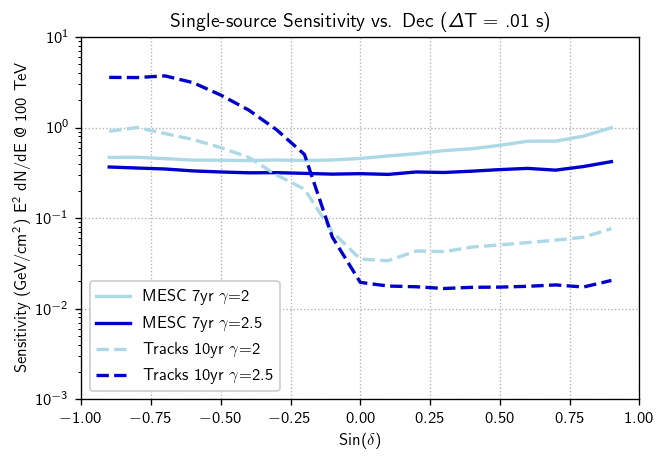

In [54]:
#MESC 7 yr cascades with different gamma
plt.plot(sin_decs,sens_cascades,label='MESC 7yr $\gamma$=2',color='lightblue')
plt.plot(sin_decs,sens_cascades_2_5,label='MESC 7yr $\gamma$=2.5',color='mediumblue')

#10 year track events with different gamma below
plt.plot(sin_decs,sens_tracks,label=r'Tracks 10yr $\gamma$=2',color='lightblue',linestyle='--')
plt.plot(sin_decs,sens_tracks_2_5,label=r'Tracks 10yr $\gamma$=2.5',color='mediumblue',linestyle='--')
#plt.plot(decs,sens_tracks_gamma_3,label=r'Tracks 10yr $\gamma$=3',color='darkblue',linestyle='--')
#plt.plot(decs,sens_tracks_timewindow_check,label=r'Tracks 10yr $\gamma$=2, T=1e5 s',color='green',linestyle='--')
#plt.xscale('log')
plt.legend()
plt.ylim(1e-3,1e1)
plt.xlim(-1,1)
plt.yscale('log')
plt.ylabel(r'Sensitivity (GeV/cm$^2$) E$^2$ dN/dE @ 100 TeV')
plt.xlabel(r'Sin($\delta$)')
plt.title(r'Single-source Sensitivity vs. Dec ($\Delta$T = .01 s)')
plt.grid(True)

In [46]:
'''
Testing stacking analysis script with 1 given time window
'''

'''
Stacking sensitivity for different time windows and different gamma (spectral indices). Gamma will range from 2-3 and the time windows will range from 10^(-2) seconds to 10^5 seconds. Stacking sensitivity will be performed with Csky likelihood software.  
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy.time import Time
import argparse
import histlite as hl
import csky as cy

#Building/loading ps tracks from analysis directory, switch selections to MESEDataSpecs.mesc_7yr for cascades
repo = cy.selections.Repository()
ana_dir = cy.utils.ensure_dir('/home/mkovacevich/FRB_analysis/cascades_ana')

repo = cy.selections.Repository()
ana = cy.analysis.Analysis(repo, cy.selections.MESEDataSpecs.mesc_7yr ,dir=ana_dir)

'''
parser = argparse.ArgumentParser(description='Process sensitivities for FRB catalog over livetime of MESC 7yr dataset')
parser.add_argument('--gamma',type=float,help='Spectral indice for E')
parser.add_argument('--dt', type=float, help='time-window in units of seconds')
args = parser.parse_args()
'''

#Calculating sensitivities, 3sigma at 90% and discovery potential as functions of different time windows for 1 FRB
#The time windows will range from ~1 ms to 10^4 seconds (following previous times windows)
cy.CONF['ana'] = ana
cy.CONF['mp_cpus'] = 10

#Source times and equitorial coordinates of FRB single bursts
source_times = ['2018-03-11T04:11:54.800','2018-03-09T02:49:32.990000','2018-03-01T07:34:19.760000','2017-12-09T20:34:23.500000','2017-09-22T11:22:23.400000','2017-08-27T16:20:18','2017-01-07T20:05:45.139000','2016-06-08T03:53:01.088000','2016-04-10T08:33:39.680000','2016-03-17T09:00:36.530000','2016-01-02T08:28:39.374000','2015-12-30T16:15:46.525000','2015-12-06T06:17:52.778000','2015-08-07T17:53:55.830000','2015-06-10T05:26:59.396000','2015-04-18T04:29:06.657000','2015-02-15T20:41:41.714000','2014-05-14T17:14:11.060000','2013-11-04T18:04:11.200000','2013-07-29T09:01:51.190000','2013-06-28T03:58:00.178000','2013-06-26T14:55:59.771000','2012-10-02T13:09:18.436000','2012-01-27T08:11:21.725000','2011-07-03T18:59:40.607000','2011-06-26T21:33:17.477000','2011-05-23T15:06:19.700000','2011-02-20T01:55:48.096000']
FRB_ra_deg = [322.89,321.18,93.18,237.60,322.46,12.33,170.69,114.17,130.35,118.45,339.70,145.21,290.35,340.63,161.11,109.15,274.36,338.52,101.04,205.34,135.76,246.77,273.70,348.77,352.71,315.93,326.30,338.66]
FRB_dec_deg = [-56.26,-32.02,4.56,-45.83,-6.01,-64.45,-4.98,-39.20,6.08,-28.39,-29.82,-2.55,-3.87,-54.92,-39.91,-18.99,-3.10,-11.69,-50.72,-4.0,3.44,-6.54,-84.80,-17.57,-1.13,-43.26,.016,-11.60]

#Converting date and times to mjd time
src_t = Time(source_times)
mjd_source_time = src_t.mjd

#loading analysis object to get mjd of time data-set and events
a = ana.anas[0]

#good_indices represents an array that tracks the indices of FRB events that fall within livetime of MESC 7 yr
FRB_mjd_time, FRB_ra_rad, FRB_dec_rad, FRB_time_window, good_indices = [],[],[],[],[]


#Now, we are going to simplify the above arrays to only include FRBs that burst during the livetime of MESC 7 yr
for i, time in enumerate(mjd_source_time):
    if float(time) >= min(a.data['mjd']) and float(time) <= max(a.data['mjd']):
        FRB_mjd_time.append(time)
        good_indices.append(i)
        
FRB_ra_rad = [np.radians(FRB_ra_deg[i]) for i in good_indices]
FRB_dec_rad = [np.radians(FRB_dec_deg[i]) for i in good_indices]
FRB_time_window = np.ones_like(FRB_ra_rad)*.01/86400.

'''
Testing sample arrays to get an idea of the timing required for stacking sources
'''
FRB_ra_rad_test, FRB_dec_rad_test = [],[]
FRB_ra_rad_test = [FRB_ra_rad[0],FRB_ra_rad[1],FRB_ra_rad[2]]
FRB_dec_rad_test = [FRB_dec_rad[0],FRB_dec_rad[1],FRB_ra_rad[2]]
FRB_time_window_test = np.ones_like(FRB_ra_rad_test)*.01/86400.
FRB_mjd_time_test = [FRB_mjd_time[0],FRB_mjd_time[1],FRB_mjd_time[2]]
        

#dt represents the time window in seconds over seconds in a day

src = cy.sources(FRB_ra_rad_test, FRB_dec_rad_test, mjd = FRB_mjd_time_test, sigma_t = np.zeros_like(FRB_ra_rad_test), t_100 = FRB_time_window_test)
conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(2)}
tr = cy.get_trial_runner(conf, src = src, ana=ana)
    
#Creating background TS distribution, using TSD rather than Chi2 due to small time window and low event rate for MESC
#TSD uses trials/data rather than Chi2 fit
n_trials = 10000
bg = cy.dists.TSD(tr.get_many_fits(n_trials))
#np.save('10yr_tracks_bg_trials'+str(i)+'gamma_2_5_correctnaming', bg, allow_pickle = True)
    
#using 1e4 signal trials for MESC, Tracks seem to produce same results for 1e4 or 1000 signal trials 
sens = tr.find_n_sig(0, .9, n_sig_step=5, batch_size=n_trials,tol=.05) 
#np.save('10yr_tracks_sensitivity_signal_trials'+str(i)+'gamma_2_5_correctnaming',sens,allow_pickle=True)
E2_sens_list.append(tr.to_E2dNdE(sens,E0=1e5))
print(tr.to_E2dNdE(sens,E0=1e5))

Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

In [23]:
'''
Programmer: Mike Kovacevich
Last edited: 11/1/20
E-mail: mgk56@drexel.edu

Stacking sensitivity for different time windows and different gamma (spectral indices). Gamma will range from 2-3 and the time windows will range from 10^(-2) seconds to 10^5 seconds. Stacking sensitivity will be performed with Csky likelihood software.  
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy.time import Time
import argparse
import histlite as hl
import csky as cy

#Building/loading MESC data from analysis directory
repo = cy.selections.Repository()
ana_dir = cy.utils.ensure_dir('/home/mkovacevich/FRB_analysis/cascades_ana')
repo = cy.selections.Repository()
ana = cy.analysis.Analysis(repo, cy.selections.MESEDataSpecs.mesc_7yr ,dir=ana_dir)

#Directories to store the trials
trials_dir = cy.utils.ensure_dir('/home/mkovacevich/FRB_analysis/trials')
sig_dir = cy.utils.ensure_dir('{}/sig'.format(trials_dir))
bg_dir = cy.utils.ensure_dir('{}/bg'.format(trials_dir)
                            )
'''
parser = argparse.ArgumentParser(description='Process sensitivities for FRB catalog over livetime of MESC 7yr dataset')
parser.add_argument('--gamma',type=float,help='Spectral indice for E')
parser.add_argument('--dt', type=float, help='time-window in units of seconds')
#parser.add_argument('--sigma',type=float, help = 'which discovery potential (3,4 or 5 sigma @ 90%) to look at')
parser.add_argument('--seed',type=float,help ='keep track of the total number of jobs submitted')
parser.add_argument('--choose',type=float,help='decide between bg (1), sig (2) and flux calculations (3)')
parser.add_argument('--bg_trials',type=float,help='the number of bg trials to run')
parser.add_argument('--sig_trials',type=float,help='the number of signal trials to run')
parser.add_argument('--cpus',type=float,help='choose the number of cpus to run for a job')
args = parser.parse_args()
'''

Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

"\nparser = argparse.ArgumentParser(description='Process sensitivities for FRB catalog over livetime of MESC 7yr dataset')\nparser.add_argument('--gamma',type=float,help='Spectral indice for E')\nparser.add_argument('--dt', type=float, help='time-window in units of seconds')\n#parser.add_argument('--sigma',type=float, help = 'which discovery potential (3,4 or 5 sigma @ 90%) to look at')\nparser.add_argument('--seed',type=float,help ='keep track of the total number of jobs submitted')\nparser.add_argument('--choose',type=float,help='decide between bg (1), sig (2) and flux calculations (3)')\nparser.add_argument('--bg_trials',type=float,help='the number of bg trials to run')\nparser.add_argument('--sig_trials',type=float,help='the number of signal trials to run')\nparser.add_argument('--cpus',type=float,help='choose the number of cpus to run for a job')\nargs = parser.parse_args()\n"

In [30]:
#Calculating sensitivities, 3sigma at 90% and discovery potential as functions of different time windows for 1 FRB
#The time windows will range from ~1 ms to 10^4 seconds (following previous times windows)
cy.CONF['ana'] = ana
cy.CONF['mp_cpus'] = 10

gamma = 2.
dt = 1.
seed = 10.
choose = 3.
bg_trials = 100000
sig_trials = 1000

#Source times and equitorial coordinates of FRB single bursts
source_times = ['2018-03-11T04:11:54.800','2018-03-09T02:49:32.990000','2018-03-01T07:34:19.760000','2017-12-09T20:34:23.500000','2017-09-22T11:22:23.400000','2017-08-27T16:20:18','2017-01-07T20:05:45.139000','2016-06-08T03:53:01.088000','2016-04-10T08:33:39.680000','2016-03-17T09:00:36.530000','2016-01-02T08:28:39.374000','2015-12-30T16:15:46.525000','2015-12-06T06:17:52.778000','2015-08-07T17:53:55.830000','2015-06-10T05:26:59.396000','2015-04-18T04:29:06.657000','2015-02-15T20:41:41.714000','2014-05-14T17:14:11.060000','2013-11-04T18:04:11.200000','2013-07-29T09:01:51.190000','2013-06-28T03:58:00.178000','2013-06-26T14:55:59.771000','2012-10-02T13:09:18.436000','2012-01-27T08:11:21.725000','2011-07-03T18:59:40.607000','2011-06-26T21:33:17.477000','2011-05-23T15:06:19.700000','2011-02-20T01:55:48.096000']
FRB_ra_deg = [322.89,321.18,93.18,237.60,322.46,12.33,170.69,114.17,130.35,118.45,339.70,145.21,290.35,340.63,161.11,109.15,274.36,338.52,101.04,205.34,135.76,246.77,273.70,348.77,352.71,315.93,326.30,338.66]
FRB_dec_deg = [-56.26,-32.02,4.56,-45.83,-6.01,-64.45,-4.98,-39.20,6.08,-28.39,-29.82,-2.55,-3.87,-54.92,-39.91,-18.99,-3.10,-11.69,-50.72,-4.0,3.44,-6.54,-84.80,-17.57,-1.13,-43.26,.016,-11.60]

#Converting date and times to mjd time
src_t = Time(source_times)
mjd_source_time = src_t.mjd

#loading analysis object to get mjd of time data-set and events
a = ana.anas[0]

#good_indices represents an array that tracks the indices of FRB events that fall within livetime of MESC 7 yr
FRB_mjd_time, FRB_ra_rad, FRB_dec_rad, FRB_time_window, good_indices = [],[],[],[],[]

#Now, we are going to simplify the above arrays to only include FRBs that burst during the livetime of MESC 7 yr
for i, time in enumerate(mjd_source_time):
    if float(time) >= min(a.data['mjd']) and float(time) <= max(a.data['mjd']):
        FRB_mjd_time.append(time)
        good_indices.append(i)
        
FRB_ra_rad = [np.radians(FRB_ra_deg[i]) for i in good_indices]
FRB_dec_rad = [np.radians(FRB_dec_deg[i]) for i in good_indices]
FRB_time_window = np.ones_like(FRB_ra_rad)*dt/86400.

In [26]:
#Defining the number of signal and background trials to run
n_bg_trials = bg_trials
n_sig_trials = sig_trials

##### Defining functions to compute background trials, signal trials and flux ######    

def do_background_trials(N=n_bg_trials):
    src = cy.sources(FRB_ra_rad, FRB_dec_rad, mjd = FRB_mjd_time, sigma_t = np.zeros_like(FRB_ra_rad), t_100 = FRB_time_window)
    conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(gamma)}
    tr = cy.get_trial_runner(conf, src = src, ana=ana)
    # run trials
    trials = tr.get_many_fits(N,logging=False)
    # save to disk
    dir = cy.utils.ensure_dir('{}/gamma/{}/dt/{}'.format(bg_dir, gamma, dt))
    filename = '{}/bg_trials_seed_{}.npy'.format(dir, seed)
    print('->', filename)
    # notice: trials.as_array is a numpy structured array, not a cy.utils.Arrays
    np.save(filename, trials.as_array)
    
n_sigs = np.r_[2:10:1, 10:30.1:2]
def do_signal_trials(n_sig, N=n_sig_trials):
    # get trial runner
    src = cy.sources(FRB_ra_rad, FRB_dec_rad, mjd = FRB_mjd_time, sigma_t = np.zeros_like(FRB_ra_rad), t_100 = FRB_time_window)
    conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(gamma)}
    tr = cy.get_trial_runner(conf, src = src, ana=ana)
    # run trials
    trials = tr.get_many_fits(N, n_sig, logging=False)
    # save to disk
    dir = cy.utils.ensure_dir('{}/gamma/{}/dt/{}/n_sig/{}'.format(sig_dir, gamma, dt, n_sig))
    filename = '{}/sig_trials_{}.npy'.format(dir, seed)
    print('->', filename)
    # notice: trials.as_array is a numpy structured array, not a cy.utils.Arrays
    np.save(filename, trials.as_array)
    
def ndarray_to_TSD(trials):
    return cy.dists.TSD(cy.utils.Arrays(trials))

In [32]:

##### The uncommented code below is 'find_n_sig' as an unwrapped function in order to debug it


def find_n_sig(beta=0.9, nsigma=None):
    # get signal trials, background distribution, and trial runner
    sig_trials = cy.bk.get_best(sig, 'gamma', gamma, 'dt', dt, 'n_sig')
    b = cy.bk.get_best(bg, 'gamma', gamma, 'dt', dt)
    src = cy.sources(FRB_ra_rad, FRB_dec_rad, mjd = FRB_mjd_time, sigma_t = np.zeros_like(FRB_ra_rad), t_100 = FRB_time_window)
    conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(gamma)}
    tr = cy.get_trial_runner(conf, src = src, ana=ana)
    # determine ts threshold
    if nsigma is not None:
        ts = b.isf_nsigma(nsigma)
    else:
        ts = b.median()
    # include background trials in calculation
    trials = {0: b.trials}
    trials.update(sig_trials)
    # get number of signal events
    # (arguments prevent additional trials from being run)
    result = tr.find_n_sig(ts, beta, max_batch_size=0, logging=False, trials=trials, n_bootstrap=1)
    # return flux
    return tr.to_E2dNdE(result, E0=1e5)
'''
bg = cy.bk.get_all('{}/'.format(bg_dir),'bg*npy', merge=np.concatenate,post_convert=ndarray_to_TSD)
print('printing bg trials' + str(bg) + '\n')

sig = cy.bk.get_all('{}/'.format(sig_dir),'sig*npy', merge=np.concatenate, post_convert=cy.utils.Arrays)
print('printing signal trials' + str(sig) + '\n') 

# get signal trials, background distribution, and trial runner
sig_trials = cy.bk.get_best(sig, 'gamma', gamma, 'dt', dt, 'n_sig')
print('printing best signal trials' + str(sig_trials) + '\n') 

b = cy.bk.get_best(bg, 'gamma', gamma, 'dt', dt)
print('printing signal trials' + str(sig) + '\n') 

src = cy.sources(FRB_ra_rad, FRB_dec_rad, mjd = FRB_mjd_time, sigma_t = np.zeros_like(FRB_ra_rad), t_100 = FRB_time_window)
conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(gamma)}
tr = cy.get_trial_runner(conf, src = src, ana=ana)
# determine ts threshold
#if nsigma is not None:
#    ts = b.isf_nsigma(nsigma)
#else:
ts = b.isf_nsigma(4)
print('ts = ' +str(ts) + '\n')
# include background trials in calculation
trials = {0: b.trials}
trials.update(sig_trials)
print('printing trials' + str(trials) + '\n')

# get number of signal events
 # (arguments prevent additional trials from being run)
result = tr.find_n_sig(ts, .9, max_batch_size=0, logging=False, trials=trials, n_bootstrap=1)
# return flux
print(tr.to_E2dNdE(result, E0=1e5))
'''

'\nbg = cy.bk.get_all(\'{}/\'.format(bg_dir),\'bg*npy\', merge=np.concatenate,post_convert=ndarray_to_TSD)\nprint(\'printing bg trials\' + str(bg) + \'\n\')\n\nsig = cy.bk.get_all(\'{}/\'.format(sig_dir),\'sig*npy\', merge=np.concatenate, post_convert=cy.utils.Arrays)\nprint(\'printing signal trials\' + str(sig) + \'\n\') \n\n# get signal trials, background distribution, and trial runner\nsig_trials = cy.bk.get_best(sig, \'gamma\', gamma, \'dt\', dt, \'n_sig\')\nprint(\'printing best signal trials\' + str(sig_trials) + \'\n\') \n\nb = cy.bk.get_best(bg, \'gamma\', gamma, \'dt\', dt)\nprint(\'printing signal trials\' + str(sig) + \'\n\') \n\nsrc = cy.sources(FRB_ra_rad, FRB_dec_rad, mjd = FRB_mjd_time, sigma_t = np.zeros_like(FRB_ra_rad), t_100 = FRB_time_window)\nconf = {\'extended\':True, \'space\':"ps",\'time\':"transient",\'sig\':"transient",\'flux\': cy.hyp.PowerLawFlux(gamma)}\ntr = cy.get_trial_runner(conf, src = src, ana=ana)\n# determine ts threshold\n#if nsigma is not None:\n#

In [36]:
#The bg and sig trials can be run at the same time used a diamond dag. Both of these trials need to be complete before
#going on to compute the sensitivities
if choose == 1:
    print('Computing bg trials for gamma = ' + str(gamma) + 'and w/ the time window ' + str(dt))
    do_background_trials(N=n_bg_trials)
    
elif choose == 2:
    print('Computing signal trials for gamma = ' + str(gamma) + 'and w/ the time window ' + str(dt))
    for n_sig in n_sigs:
        do_signal_trials(n_sig, N=n_sig_trials)
        
elif choose == 3:
    bg = cy.bk.get_all('{}/'.format(bg_dir),'bg*npy', merge=np.concatenate,post_convert=ndarray_to_TSD)
    sig = cy.bk.get_all('{}/'.format(sig_dir),'sig*npy', merge=np.concatenate, post_convert=cy.utils.Arrays)
    fluxs_sens = []
    fluxs_sens = find_n_sig(beta=0.9)
    print(fluxs_sens)
    np.save('sens_gamma_'+str(gamma)+'dt'+str(dt),fluxs_sens,allow_pickle=True)
    
    fluxs_3sig_disc,fluxs_4sig_disc, fluxs_5sig_disc = [],[],[]
    fluxs_3sig_disc = find_n_sig(beta=0.9,nsigma=3.)
    np.save('3sig_gamma_'+str(gamma)+'dt'+str(dt),fluxs_3sig_disc,allow_pickle=True)
    print(fluxs_3sig_disc)
    fluxs_4sig_disc = find_n_sig(beta=0.9,nsigma=4.)
    np.save('4sig_gamma_'+str(gamma)+'dt'+str(dt),fluxs_4sig_disc,allow_pickle=True)
    print(fluxs_4sig_disc)
    fluxs_5sig_disc = find_n_sig(beta=0.9,nsigma=5.)
    np.save('5sig_gamma_'+str(gamma)+'dt'+str(dt),fluxs_5sig_disc,allow_pickle=True)
    print(fluxs_5sig_disc)
    

0.2685530962014679
0.2685530962014679
0.2685641820852567


Process Process-491:
Traceback (most recent call last):
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_6_x86_64/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/cvmfs/icecube.opensciencegrid.org/py3-v4.1.0/RHEL_6_x86_64/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/lfs7/user/mkovacevich/csky/csky/trial.py", line 2073, in get_n_sig_bootstraps
    for seed in seeds])
  File "/mnt/lfs7/user/mkovacevich/csky/csky/trial.py", line 2073, in <listcomp>
    for seed in seeds])
  File "/mnt/lfs7/user/mkovacevich/csky/csky/trial.py", line 2019, in get_n_sig_batches
    sigmas[~i] = np.min(sigmas[i])
  File "<__array_function__ internals>", line 6, in amin
  File "/home/mkovacevich/py3venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py", line 2831, in amin
    keepdims=keepdims, initial=initial, where=where)
  File "/home/mkovacevich/py3venv/lib/python3.7/site-packag

UnboundLocalError: local variable 'n_sig' referenced before assignment

In [3]:
'''
Programmer: Mike Kovacevich
Last edited: 11/1/20
E-mail: mgk56@drexel.edu

Stacking sensitivity for different time windows and different gamma (spectral indices). Gamma will range from 2-3 and the time windows will range from 10^(-2) seconds to 10^5 seconds. Stacking sensitivity will be performed with Csky likelihood software.  
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from astropy.time import Time
import argparse
import histlite as hl
import csky as cy

#Building/loading MESC data from analysis directory
repo = cy.selections.Repository()
ana_dir = cy.utils.ensure_dir('/home/mkovacevich/FRB_analysis/cascades_ana')
repo = cy.selections.Repository()
ana = cy.analysis.Analysis(repo, cy.selections.MESEDataSpecs.mesc_7yr ,dir=ana_dir)

'''
#Directories to store the trials
trials_dir = cy.utils.ensure_dir('/home/mkovacevich/FRB_analysis/trials')
sig_dir = cy.utils.ensure_dir('{}/sig'.format(trials_dir))
bg_dir = cy.utils.ensure_dir('{}/bg'.format(trials_dir))

parser = argparse.ArgumentParser(description='Process sensitivities for FRB catalog over livetime of MESC 7yr dataset')
parser.add_argument('--gamma',type=float,help='Spectral indice for E')
parser.add_argument('--dt', type=float, help='time-window in units of seconds')
#parser.add_argument('--sigma',type=float, help = 'which discovery potential (3,4 or 5 sigma @ 90%) to look at')
parser.add_argument('--seed',type=float,help ='keep track of the total number of jobs submitted')
parser.add_argument('--choose',type=float,help='decide between bg (1), sig (2) and flux calculations (3)')
parser.add_argument('--bg_trials',type=float,help='the number of bg trials to run')
parser.add_argument('--sig_trials',type=float,help='the number of signal trials to run')
parser.add_argument('--cpus',type=float,help='choose the number of cpus to run for a job')
args = parser.parse_args()
'''

#Calculating sensitivities, 3sigma at 90% and discovery potential as functions of different time windows for 1 FRB
#The time windows will range from ~1 ms to 10^4 seconds (following previous times windows)
cy.CONF['ana'] = ana
cy.CONF['mp_cpus'] = 10

#Source times and equitorial coordinates of FRB single bursts
source_times = ['2018-03-11T04:11:54.800','2018-03-09T02:49:32.990000','2018-03-01T07:34:19.760000','2017-12-09T20:34:23.500000','2017-09-22T11:22:23.400000','2017-08-27T16:20:18','2017-01-07T20:05:45.139000','2016-06-08T03:53:01.088000','2016-04-10T08:33:39.680000','2016-03-17T09:00:36.530000','2016-01-02T08:28:39.374000','2015-12-30T16:15:46.525000','2015-12-06T06:17:52.778000','2015-08-07T17:53:55.830000','2015-06-10T05:26:59.396000','2015-04-18T04:29:06.657000','2015-02-15T20:41:41.714000','2014-05-14T17:14:11.060000','2013-11-04T18:04:11.200000','2013-07-29T09:01:51.190000','2013-06-28T03:58:00.178000','2013-06-26T14:55:59.771000','2012-10-02T13:09:18.436000','2012-01-27T08:11:21.725000','2011-07-03T18:59:40.607000','2011-06-26T21:33:17.477000','2011-05-23T15:06:19.700000','2011-02-20T01:55:48.096000']
FRB_ra_deg = [322.89,321.18,93.18,237.60,322.46,12.33,170.69,114.17,130.35,118.45,339.70,145.21,290.35,340.63,161.11,109.15,274.36,338.52,101.04,205.34,135.76,246.77,273.70,348.77,352.71,315.93,326.30,338.66]
FRB_dec_deg = [-56.26,-32.02,4.56,-45.83,-6.01,-64.45,-4.98,-39.20,6.08,-28.39,-29.82,-2.55,-3.87,-54.92,-39.91,-18.99,-3.10,-11.69,-50.72,-4.0,3.44,-6.54,-84.80,-17.57,-1.13,-43.26,.016,-11.60]

#Converting date and times to mjd time
src_t = Time(source_times)
mjd_source_time = src_t.mjd

#loading analysis object to get mjd of time data-set and events
a = ana.anas[0]

#good_indices represents an array that tracks the indices of FRB events that fall within livetime of MESC 7 yr
FRB_mjd_time, FRB_ra_rad, FRB_dec_rad, FRB_time_window, good_indices = [],[],[],[],[]

#Now, we are going to simplify the above arrays to only include FRBs that burst during the livetime of MESC 7 yr
for i, time in enumerate(mjd_source_time):
    if float(time) >= min(a.data['mjd']) and float(time) <= max(a.data['mjd']):
        FRB_mjd_time.append(time)
        good_indices.append(i)
        
FRB_ra_rad = [np.radians(FRB_ra_deg[i]) for i in good_indices]
FRB_dec_rad = [np.radians(FRB_dec_deg[i]) for i in good_indices]
#FRB_time_window = np.ones_like(FRB_ra_rad)*args.dt/86400.
print(FRB_dec_rad)


Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/